# fastReach Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle

from itertools import cycle

<font size="5">     <b>Loading data</b>

In [2]:
pID = '4'

path = "/Users/willy/Documents/GitHub/2021-fastReach/data/study/eeglab2python/"

data_fname = '\data.csv'
data = pd.read_csv(path+pID+data_fname)

<font size="5">     <b>Feature extraction</b>

<u/>1) EEG Readiness Potential<u/>

In [3]:
win_mean_size = 25
win_mean1 = np.arange(len(data))//win_mean_size  #List with all the indices with floor division of the size reduction. 
                                                # --> 24500 indices ranging from 0 to 980.

win_mean = data.groupby(win_mean1).mean()

df2 = win_mean.pivot(index=['epoch_ix', 'rp_class'], columns='sample', values=win_mean.columns[4:].tolist())
df2.reset_index(inplace=True)

df2

epoch_ix rp_class         F2                                   \
sample                       -0.948     -0.848     -0.748     -0.648   
0           1.0      1.0   3.282288  -2.864277 -10.539297 -11.399815   
1           2.0      1.0  -1.528737  -7.494974 -10.964169  -9.840232   
2           3.0      1.0  -7.473053  -5.078388  -7.415267  -2.027202   
3           4.0      1.0   2.679745   8.918466  10.453093   1.300576   
4           5.0      1.0 -30.362271 -49.097795 -46.536114 -41.969156   
..          ...      ...        ...        ...        ...        ...   
93         94.0      2.0  -3.423430  -7.376545  -7.311667  -3.612773   
94         95.0      2.0  -2.003583  -2.751980 -11.247545 -15.022379   
95         96.0      2.0  -3.256235  -5.952935  -7.394158  -6.318371   
96         97.0      2.0   2.029714  14.659434  26.050561  28.127828   
97         98.0      2.0   0.666228   6.954978   8.786285   9.559998   

                                                                       ...  \
sample -0.5479999999999999 -0.44799999999999995     -0.348     -0.248  ...   
0               -17.454392             6.687935  17.822065  13.583739  ...   
1               -13.201647           -24.482395 -22.616821 -23.093906  ...   
2                -2.112458            -7.625805   0.897511   3.516418  ...   
3                -5.114602            -7.059904  -2.354670   1.516518  ...   
4               -39.076412           -40.783365 -33.788141 -26.030446  ...   
..                     ...                  ...        ...        ...  ...   
93               -9.009335           -12.149962  -2.261219  -8.654598  ...   
94              -18.990101           -21.790945 -15.468030 -10.495412  ...   
95               -5.888396            -3.014071 -10.286468   7.619862  ...   
96               27.423531            34.738249  32.301454  33.352569  ...   
97                3.947659             0.692298   7.078276   9.789315  ...   

               Oz                                                       \
sample     -0.948     -0.848     -0.748     -0.648 -0.5479999999999999   
0       -0.922527   2.617241   4.184626   2.640527            7.848075   
1        1.522111   1.501207   9.121252   8.381323          -16.802737   
2       14.289437  24.167478  26.194310  22.684586           22.984157   
3       -4.463095 -22.889971 -23.813612 -12.302784          -10.176818   
4       11.267029  22.065584  27.163310  29.351040           27.274924   
..            ...        ...        ...        ...                 ...   
93       1.411396  -3.396190   2.420803   3.632321            8.700813   
94      -0.218325   3.927987   3.725214   4.206754            4.655766   
95      -0.824558  -1.312089  -2.933522  -1.137531           -4.399715   
96      -0.958414  -8.727340 -10.439504  -2.582328           -0.194871   
97       1.788243   1.788488  -0.929442  -2.686232           -3.282807   

                                                                        \
sample -0.44799999999999995     -0.348     -0.248 -0.14800000000000002   
0                 13.466062  16.336413  24.368560            12.298253   
1                -27.511083 -15.464435  -9.136322            -9.053727   
2                 -0.800211  -8.272674   3.247681             6.002627   
3                 -8.099017 -12.552708  -7.341915           -10.711068   
4                 32.360032  27.672612  26.717159            30.461451   
..                      ...        ...        ...                  ...   
93                 8.481800   8.598577  -0.710041           -11.058030   
94                 5.664056   8.829470   9.295564             6.746931   
95                -8.687288 -22.229305  -6.909282             1.972092   
96                -1.437661  -2.878803   2.208519             2.925428   
97                 1.529352   6.109620   4.665368             0.234689   

                   
sample     -0.048  
0        5.927113  
1       -4.571908  
2       10.004679  
3       -6.833907  
4       3

<u/>2) EMG Time-domain features<u/>

In [4]:
# Definition of the features

def rms(values):
    return np.sqrt(sum(values**2)/len(values))

def mini(values):
    return np.min(values)

def maxi(values):
    return np.max(values)

def mav(values):
    return sum(abs(values))/len(values)

def mean(values):
    return sum(values)/len(values)

def var(values):
    return np.var(values)

#def wave(values):
#    values = np.asarray(values, dtype=object)
#    a = np.asarray(values[1:,1], dtype=object)
#    b = np.asarray(values[:-1,1], dtype=object)
#    t = np.sum(np.abs(a - b))
#    return t

In [5]:
#List and application of the features

feat_list = [rms, mini, maxi, mav, mean, var]

bibi =[None] * len(feat_list)
delto =[None] * len(feat_list)
bibi_2 =[None] * len(feat_list)
delto_2 =[None] * len(feat_list)

#Version 1: Get 10 features per channel per epoch
for i in range(len(feat_list)):
    bibi[i] = data.groupby(win_mean1)['Cz'].apply(feat_list[i])
    delto[i] = data.groupby(win_mean1)["T7"].apply(feat_list[i])

#Version 2:  Get 1 feature per channel per epoch
for i in range(len(feat_list)):
    bibi_2[i] = data.groupby(['epoch_ix'])['Cz'].apply(feat_list[i])
    delto_2[i] = data.groupby(['epoch_ix'])["T7"].apply(feat_list[i])

<font size="5">     <b>Building the Dataframe</b>

<font size="3">     <b>version 1: 10 EMG features per epoch </b>

In [6]:
#Labels
sample = win_mean['sample']
Class = np.asarray([data['rp_class'][0] for i in range(int(bibi[0].shape[0]/2))] + \
        [data['rp_class'][24499] for i in range(int(bibi[0].shape[0]/2))])
epoch = win_mean['epoch_ix']

l = np.column_stack((sample, Class, epoch))
lab = pd.DataFrame(l, columns = ['sample','Class','epoch'])

#Features' labels
#Naming the features
feat_list = ['rms', 'mini', 'maxi', 'mav', 'mean', 'var']
chan_Bibi = [f'Bibi_{feat}' for feat in feat_list]
chan_Delto = [f'Delto_{feat}' for feat in feat_list]

#Features dataframe Version 1
m1 = [bibi[i] for i in range(len(feat_list))]
m2 = [delto[i] for i in range(len(feat_list))]
f1 = np.column_stack((m1))
f2 = np.column_stack((m2))
f = np.column_stack((f1, f2))
feat = pd.DataFrame(f, columns = chan_Bibi + chan_Delto)

#Concat labels and features
feat = feat.astype(float)
FM = pd.concat([lab, feat], axis=1)

<font size="3">     <b>version 1: 1 EMG feature per epoch </b>

In [7]:
#Labels
sample_2 = np.asarray([1]*98)
Class_2 = np.asarray([data['rp_class'][0] for i in range(int(bibi_2[0].shape[0]/2))] + \
        [data['rp_class'][24499] for i in range(int(bibi_2[0].shape[0]/2))])
epoch_2 = np.arange(1,data['epoch_ix'].max() + 1)

l_2 = np.column_stack((sample_2, Class_2, epoch_2))
lab_2 = pd.DataFrame(l_2, columns = ['sample','Class','epoch'])

#Features dataframe Version 2
m1_2 = [bibi_2[i] for i in range(len(feat_list))]
m2_2 = [delto_2[i] for i in range(len(feat_list))]
f1_2 = np.column_stack((m1_2))
f2_2 = np.column_stack((m2_2))
f_2 = np.column_stack((f1_2, f2_2))
feat_2 = pd.DataFrame(f_2, columns = chan_Bibi + chan_Delto)

#Concat labels and features 2
feat_2 = feat_2.astype(float)
FM_2 = pd.concat([lab_2, feat_2], axis=1)

In [8]:
#Reshape the EMG dataframe
df3 = FM.pivot(index=['epoch', 'Class'], columns='sample', values=FM.columns[4:].tolist())
df3.reset_index(inplace=True)

#Concat EEG and EMG DataFrame
EEG_EMG = pd.concat([df2, df3.iloc[:,3:]], axis=1)

#Reshape the EMG dataframe 2
df3_2 = FM_2.pivot(index=['epoch', 'Class'], columns='sample', values=FM_2.columns[4:].tolist())
df3_2.reset_index(inplace=True)

#Concat EEG and EMG DataFrame 2
EEG_EMG_2 = pd.concat([df2, df3_2.iloc[:,3:]], axis=1)

In [9]:
EEG_EMG

epoch_ix rp_class         F2                                   \
sample                       -0.948     -0.848     -0.748     -0.648   
0           1.0      1.0   3.282288  -2.864277 -10.539297 -11.399815   
1           2.0      1.0  -1.528737  -7.494974 -10.964169  -9.840232   
2           3.0      1.0  -7.473053  -5.078388  -7.415267  -2.027202   
3           4.0      1.0   2.679745   8.918466  10.453093   1.300576   
4           5.0      1.0 -30.362271 -49.097795 -46.536114 -41.969156   
..          ...      ...        ...        ...        ...        ...   
93         94.0      2.0  -3.423430  -7.376545  -7.311667  -3.612773   
94         95.0      2.0  -2.003583  -2.751980 -11.247545 -15.022379   
95         96.0      2.0  -3.256235  -5.952935  -7.394158  -6.318371   
96         97.0      2.0   2.029714  14.659434  26.050561  28.127828   
97         98.0      2.0   0.666228   6.954978   8.786285   9.559998   

                                                                       ...  \
sample -0.5479999999999999 -0.44799999999999995     -0.348     -0.248  ...   
0               -17.454392             6.687935  17.822065  13.583739  ...   
1               -13.201647           -24.482395 -22.616821 -23.093906  ...   
2                -2.112458            -7.625805   0.897511   3.516418  ...   
3                -5.114602            -7.059904  -2.354670   1.516518  ...   
4               -39.076412           -40.783365 -33.788141 -26.030446  ...   
..                     ...                  ...        ...        ...  ...   
93               -9.009335           -12.149962  -2.261219  -8.654598  ...   
94              -18.990101           -21.790945 -15.468030 -10.495412  ...   
95               -5.888396            -3.014071 -10.286468   7.619862  ...   
96               27.423531            34.738249  32.301454  33.352569  ...   
97                3.947659             0.692298   7.078276   9.789315  ...   

        Delto_var                                                       \
sample     -0.948     -0.848     -0.748     -0.648 -0.5479999999999999   
0        2.011027   8.944829  22.241729   3.666572           28.928066   
1        1.061384   1.898542   2.789111   0.577715           12.248568   
2       28.191530   3.745698   3.563367   9.623938            2.634071   
3        0.128162   1.463051   2.755890   6.762058            0.694028   
4       80.753800   0.805646   1.019107   5.727208            0.456741   
..            ...        ...        ...        ...                 ...   
93       3.172246   0.579677   1.416414  11.073385            3.198975   
94       1.266167   2.083955  11.425555   1.203771            2.875641   
95       6.955478   0.084419   3.038218   0.740631            0.711588   
96       0.191856  19.237022   1.853400   3.768271            1.456652   
97       2.997250   0.629186  14.236499   3.222155            1.075812   

                                                                       \
sample -0.44799999999999995    -0.348     -0.248 -0.14800000000000002   
0                 18.805134  0.625730  19.029558             8.068903   
1                  0.460132  0.180124   0.728346             0.784881   
2                 51.607354  7.263005   1.337929             3.374029   
3                  1.498024  0.257138   0.364294             0.073748   
4                  3.340642  0.041181   1.000576             8.256455   
..                      ...       ...        ...                  ...   
93                 4.096876  0.488642   9.003859            57.882358   
94                 4.447176  1.166212   0.717007             0.599223   
95                 1.300066  2.185210   0.070489             2.325730   
96                 0.496000  1.841609   0.067316             0.973489   
97                 1.810741  0.669238   5.259437             0.514371   

                   
sample     -0.048  
0       10.036511  
1        1.620588  
2        2.022980  
3        3.602445  
4        1.606458  
..

In [10]:
EEG_EMG_2

epoch_ix rp_class         F2                                   \
sample                       -0.948     -0.848     -0.748     -0.648   
0           1.0      1.0   3.282288  -2.864277 -10.539297 -11.399815   
1           2.0      1.0  -1.528737  -7.494974 -10.964169  -9.840232   
2           3.0      1.0  -7.473053  -5.078388  -7.415267  -2.027202   
3           4.0      1.0   2.679745   8.918466  10.453093   1.300576   
4           5.0      1.0 -30.362271 -49.097795 -46.536114 -41.969156   
..          ...      ...        ...        ...        ...        ...   
93         94.0      2.0  -3.423430  -7.376545  -7.311667  -3.612773   
94         95.0      2.0  -2.003583  -2.751980 -11.247545 -15.022379   
95         96.0      2.0  -3.256235  -5.952935  -7.394158  -6.318371   
96         97.0      2.0   2.029714  14.659434  26.050561  28.127828   
97         98.0      2.0   0.666228   6.954978   8.786285   9.559998   

                                                                       ...  \
sample -0.5479999999999999 -0.44799999999999995     -0.348     -0.248  ...   
0               -17.454392             6.687935  17.822065  13.583739  ...   
1               -13.201647           -24.482395 -22.616821 -23.093906  ...   
2                -2.112458            -7.625805   0.897511   3.516418  ...   
3                -5.114602            -7.059904  -2.354670   1.516518  ...   
4               -39.076412           -40.783365 -33.788141 -26.030446  ...   
..                     ...                  ...        ...        ...  ...   
93               -9.009335           -12.149962  -2.261219  -8.654598  ...   
94              -18.990101           -21.790945 -15.468030 -10.495412  ...   
95               -5.888396            -3.014071 -10.286468   7.619862  ...   
96               27.423531            34.738249  32.301454  33.352569  ...   
97                3.947659             0.692298   7.078276   9.789315  ...   

        Bibi_maxi   Bibi_mav  Bibi_mean    Bibi_var  Delto_rms Delto_mini  \
sample          1          1          1           1          1          1   
0       31.624582  15.285760   8.877288  257.075756  12.448452 -27.571834   
1        1.761458  15.318646 -15.228674  130.737368   4.923638  -9.273304   
2       20.830936  10.502936   8.199693   84.891397   9.346490  -7.435611   
3        4.308070   3.489020  -2.032499   25.460551   4.376511  -5.590211   
4       22.245187  12.449218  12.276269   25.915651  27.065672   0.000000   
..            ...        ...        ...         ...        ...        ...   
93       9.709690   4.278984  -1.960238   32.523041   9.911728 -26.854090   
94       6.563398   3.767835   3.047807    9.806193   5.401581  -4.893885   
95       5.760423   6.502887  -4.869054   52.089301   3.592688  -3.576631   
96      13.979725   7.378343   5.141259   46.578877   5.813749 -14.000626   
97       3.437837   2.695895  -1.394123   10.689697   5.138802 -10.423288   

       Delto_maxi  Delto_mav Delto_mean   Delto_var  
sample          1          1          1           1  
0       13.965003   9.380517  -3.690297  141.345672  
1        5.636231   4.278474  -2.893277   15.871160  
2       17.882818   7.438706   5.898855   52.560380  
3        8.771626   3.653324   2.121737   14.652077  
4       37.515592  26.388075  26.388075   36.220122  
..            ...        ...        ...         ...  
93      12.477568   7.865865   1.360125   96.392405  
94      10.360451   4.730657   4.381622    9.978467  
95       7.203799   2.924064   2.210673    8.020333  
96       7.631426   4.470601  -3.508964   21.486857  
97       4.019903   4.416723  -3.742457   12.401304  

[98 rows x 212 columns]

<font size="5">     <b>Plots (will work on that later)</b>

<u/>1) Features<u/>

KeyError: '1'

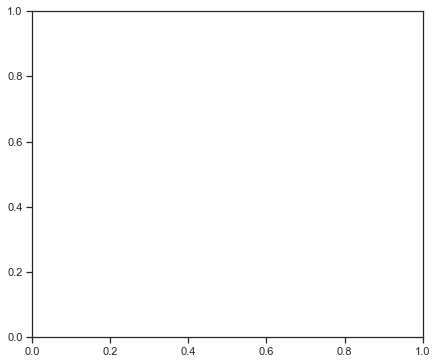

In [12]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
group_var = "rp_class"
val_var = ["1"]
F1 = sns.boxplot(x=group_var, y=val_var, data=EEG_EMG,
            whis=[0, 100], width=.6, palette="vlag")
F1.set(title='Biceps - Root Mean Square')

# Add in points to show each observation
sns.stripplot(x=group_var, y=val_var, data=EEG_EMG,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

<font size="5">     <b>Linear Discriminent Analysis</b>

In [13]:
X_train = EEG_EMG.iloc[:,3:]
Y_train = np.asarray(EEG_EMG['rp_class'])

clf = LDA()

clf.fit(X_train, Y_train)

kfolds = KFold(n_splits=10, random_state=1, shuffle=True)

cv_results = cross_val_score(clf, X_train, Y_train, cv=kfolds)
cv_average = cv_results.mean()
print(cv_average)
st_deviation = cv_results.std()

test = [np.random.randint(15, size=308)]

print(clf.predict(test))
print(clf.predict_proba(test))

0.5644444444444445
[2.]
[[4.4408921e-16 1.0000000e+00]]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(EEG_EMG.iloc[:,3:], np.asarray(EEG_EMG['rp_class']), test_size=0.5, random_state=0)

clf = LDA()

y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=2)
roc_auc = auc(fpr, tpr)

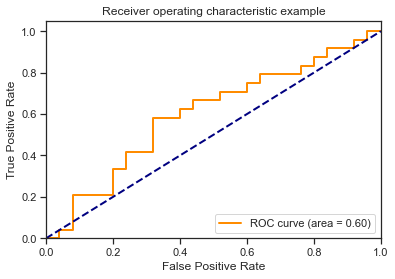

In [15]:
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()